## Reading Images

You can load different types of images, including PNG and JPG... these can be load in gray scale, color or images with alpha channels (explain this...)

The OpenCV function to loads images is `cv2.imread()`. Using the next sintax:

`retval = cv2.imread(filename[, flags])`
If it is successfully loaded, `retval` contains the images. Otherwise,  `retval` is `None`.

The `imread` function has one required input argument (`filename`) and one optional (`flag`).

* `filename` you must provide to  path filename. **It's mandatory.*
* `flags`: these are used to read the image in a specific format (color, grayscale or with alpha channel).

There are two ways to provide the flags in the `imread` function:

* `cv2.IMREAD_GRAYSCALE` or `0`
* `cv2.IMREAD_COLOR` or `1`
* `cv2.IMREAD_UNCHANGED` or `-1`


Let's see it in the code:


In [3]:
import cv2 as cv
print("cv.IMREAD_GRAYSCALE returns as result: ", end=" ")
print(cv.IMREAD_GRAYSCALE)      # Result 0

print("cv.IMREAD_COLOR returns as result: ", end=" ")
print(cv.IMREAD_COLOR)      # Result 1

print("cv.IMREAD_UNCHANGED returns as result: ", end=" ")
print(cv.IMREAD_UNCHANGED)      #

cv.IMREAD_GRAYSCALE returns as result:  0
cv.IMREAD_COLOR returns as result:  1
cv.IMREAD_UNCHANGED returns as result:  -1


Now let's try to create a complete script to read images:

In [1]:
import cv2 as cv

path_image = 'tesla_model_x.jpg'
retval = cv.imread(filename=path_image, flags=1)
print(retval)

[[[112 121 131]
  [ 87 103 110]
  [ 76 103 107]
  ...
  [219 177 140]
  [219 177 140]
  [219 177 140]]

 [[ 66  87 102]
  [ 56  82  94]
  [ 54  87  96]
  ...
  [219 177 140]
  [219 177 140]
  [219 177 140]]

 [[ 65 110 131]
  [ 61 106 127]
  [ 50  97 119]
  ...
  [220 178 141]
  [220 178 141]
  [218 179 141]]

 ...

 [[221 216 217]
  [221 216 217]
  [216 211 212]
  ...
  [215 204 200]
  [213 204 200]
  [215 204 200]]

 [[212 207 208]
  [210 205 206]
  [204 199 200]
  ...
  [219 208 204]
  [219 208 204]
  [219 208 204]]

 [[218 216 215]
  [213 211 210]
  [202 200 199]
  ...
  [220 208 204]
  [220 208 204]
  [219 208 204]]]


As you can see, the printed value is a big matrix that represents the values for each pixel. 

But if math is boring to you, we can see it as an image using `matplotlib`:

Let's start with an gray scale image

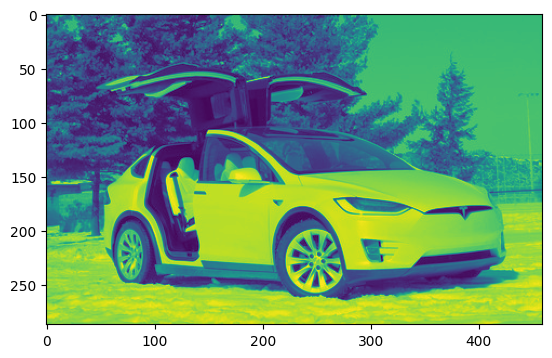

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

path_image = 'tesla_model_x.jpg'
retval = cv.imread(filename=path_image, flags=cv.IMREAD_GRAYSCALE)
plt.imshow(retval)
plt.show()

#### Oops! Something went wrong.
If we are usig matplotlib to show an grayscale image it's necessary to include the `cmap='gray'` argument in the `imshow` function.

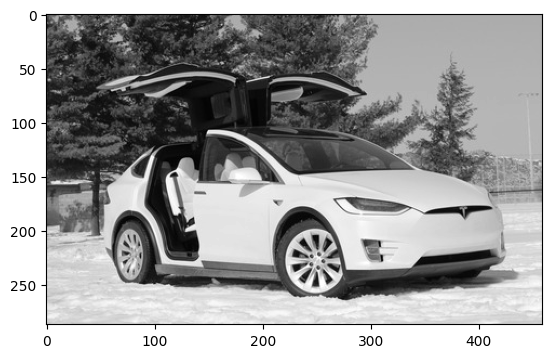

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

path_image = 'tesla_model_x.jpg'
retval = cv.imread(filename=path_image, flags=cv.IMREAD_GRAYSCALE)
plt.imshow(retval, cmap='gray')
plt.show()

Now let's talk about the color format images.
While grayscale images are numerically representated by one matrix, you can imagine a color image as a stack of three matrices of the same size.
Each layer of the stack is called channel, and the combination of these 3 channels (in each matrix coordinate) produces the color of each pixel.

OpenCV uses the color format BGR (Blue, Green, Red)

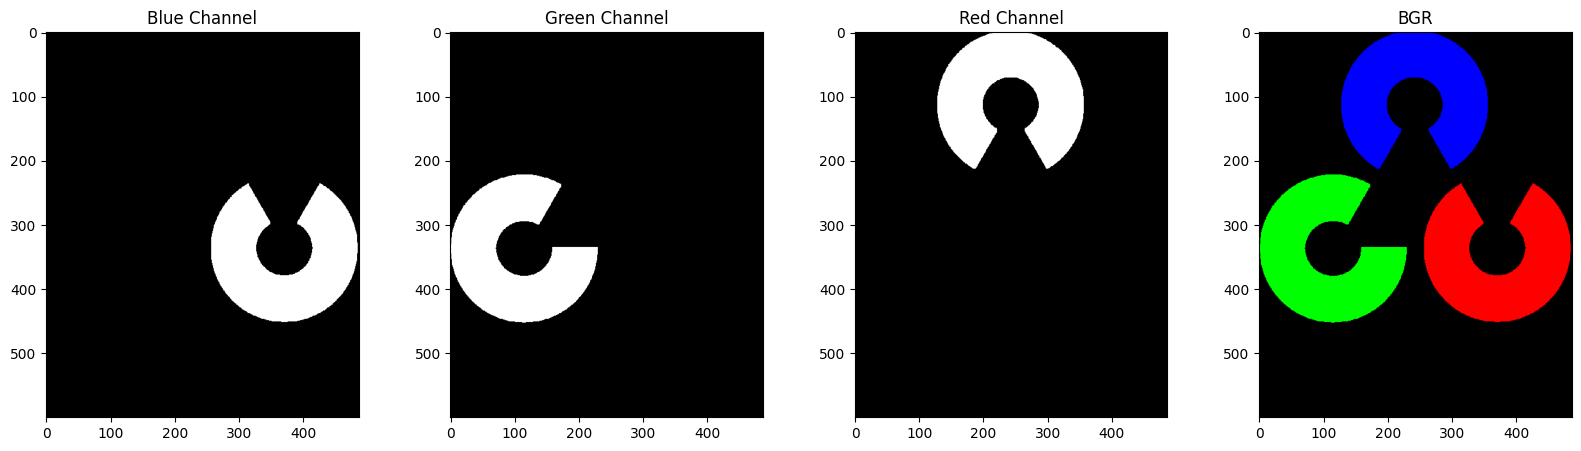

In [28]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

path_image = 'opencv_logo.png'
img = cv.imread(filename=path_image, flags=1)

# Split the image
## We can use the cv2.split() function, but this is a more didactic method
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(B, cmap='gray');plt.title('Blue Channel');
plt.subplot(142);plt.imshow(G, cmap='gray');plt.title('Green Channel');
plt.subplot(143);plt.imshow(R, cmap='gray');plt.title('Red Channel');

plt.subplot(144);plt.imshow(img);plt.title('BGR Format');

plt.show()



If you have an eagle eye, sure you noticed the error in the image 4. The colors blue and red are wrong. The original opencv logo is different.

Let's remember that OpenCV read color images in BGR format, so if you need to plot the images with matplotlib you must to reverse the order to RGB format. We can use the OpenCV native function `cv.cvtColor` or use a matrix contraption.

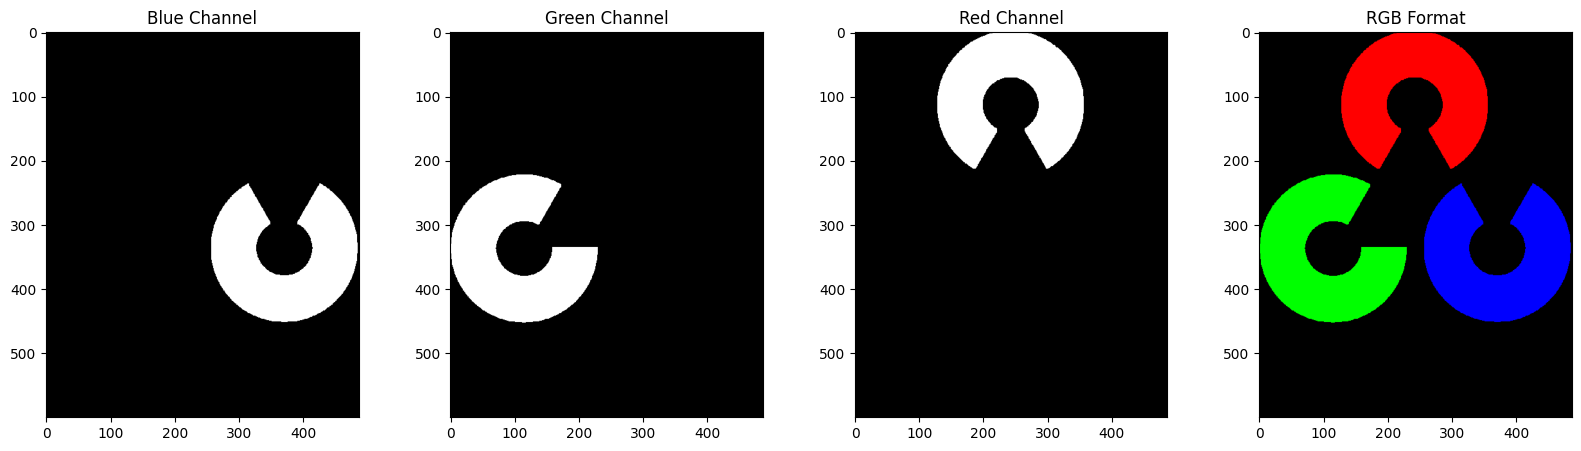

In [38]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

path_image = 'opencv_logo.png'
img = cv.imread(filename=path_image, flags=1)

# Split the image
## We can use the cv2.split() function, but this is a more didactic method
B = img[:,:,0]
G = img[:,:,1]
R = img[:,:,2]

# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(B, cmap='gray');plt.title('Blue Channel');
plt.subplot(142);plt.imshow(G, cmap='gray');plt.title('Green Channel');
plt.subplot(143);plt.imshow(R, cmap='gray');plt.title('Red Channel');

# Reverse the matrix from BGR to RGB
#rgb_image = cv.cvtColor(retval, cv.COLOR_BGR2RGB)
rgb_image = img[:,:,::-1]

plt.subplot(144);plt.imshow(rgb_image);plt.title('RGB Format');

plt.show()


## Saving Images

As simple as you can read images, you can too save images using `cv2.imwrite()` function. This function has two required arguments:
`filename`: this can be an absolute or relative path, including the format (PNG, JPG, etc)
`img`: image to be saved.

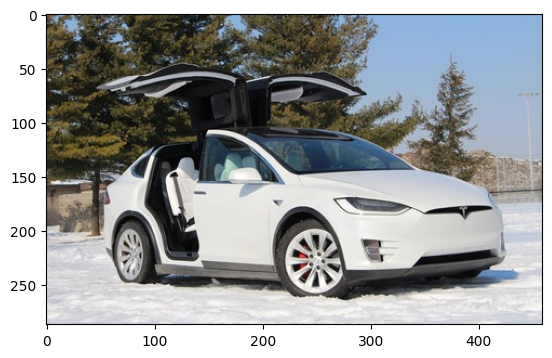

True

In [45]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

path_image = 'tesla_model_x.jpg'
img = cv.imread(filename=path_image, flags=cv.IMREAD_COLOR)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

cv.imwrite('tesla_modelx_save.png', img)